In [29]:
import matplotlib.pyplot as plt
import numpy as np

from qctrlvisualizer import get_qctrl_style, plot_controls
from qctrl import Qctrl

qctrl = Qctrl()

In [30]:
max_rabi_rate = 20 * 2 * np.pi  # MHz

In [31]:
control_count = 5
segment_count = 8
duration = np.pi / (max_rabi_rate)
shot_count = 32

[{'duration': 0.025, 'values': array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])}]
[{'duration': 0.025, 'values': array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])}, {'duration': 0.025, 'values': array([0.06207156+0.00125199j, 0.05696168+0.09301704j,
       0.00887464+0.00166093j, 0.05630521+0.07267529j,
       0.01737938+0.05729913j, 0.04410908+0.04465947j,
       0.08849035+0.02983849j, 0.02880004+0.08150496j])}]
[{'duration': 0.025, 'values': array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])}, {'duration': 0.025, 'values': array([0.06207156+0.00125199j, 0.05696168+0.09301704j,
       0.00887464+0.00166093j, 0.05630521+0.07267529j,
       0.01737938+0.05729913j, 0.04410908+0.04465947j,
       0.08849035+0.02983849j, 0.02880004+0.08150496j])}, {'duration': 0.025, 'values': array([0.08220626+0.0590653j , 0.06019007+0.04092483j,
       0.18094085+0.00301916j, 0.00850237+0.1450092j ,
       0.06281302+0.07550378j, 0.130939

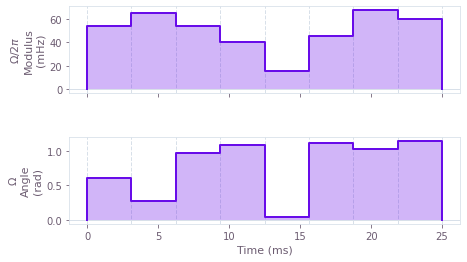

In [42]:
controls = []
for k in range(control_count):
    # Create a random string of complex numbers for each controls.
    real_part = np.random.random(size=[segment_count])
    imag_part = np.random.random(size=[segment_count])
    values = 0.1 * k * (real_part + 1j * imag_part)

    controls.append({"duration": duration, "values": values})
    print(controls)
# Plot the last control as an example.
plot_controls(
    figure=plt.figure(),
    controls={
        "$\Omega$": [
            {"duration": duration / segment_count, "value": value} for value in values
        ]
    },
)

In [38]:
# Obtain the results of the experiment.
experiment_results = qctrl.functions.calculate_qchack_measurements(
    controls=controls,
    shot_count=shot_count,
)

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 3s.


In [39]:
measurements = experiment_results.measurements
for k, measurement_counts in enumerate(measurements):
    print(f"control #{k}: {measurement_counts}")

control #0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
control #1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
control #2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
control #3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
control #4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [40]:
for k, measurement_counts in enumerate(measurements):
    p0 = measurement_counts.count(0) / shot_count
    p1 = measurement_counts.count(1) / shot_count
    p2 = measurement_counts.count(2) / shot_count
    print(f"control #{k}: P(|0>) = {p0:.2f}, P(|1>) = {p1:.2f}, P(|2>) = {p2:.2f}")

control #0: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00
control #1: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00
control #2: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00
control #3: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00
control #4: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00


In [41]:
repetitions = [1, 4, 16, 32, 64]

controls = []
# Create a random string of complex numbers for all control,
# but set a different repetition_count for each control.
real_part = np.random.random(size=[segment_count])
imag_part = np.random.random(size=[segment_count])
values = 0.5 * (real_part + 1j * imag_part)

for repetition_count in repetitions:
    controls.append(
        {"duration": duration, "values": values, "repetition_count": repetition_count}
    )

experiment_results = qctrl.functions.calculate_qchack_measurements(
    controls=controls,
    shot_count=shot_count,
)

for repetition_count, measurement_counts in zip(
    repetitions, experiment_results.measurements
):
    p0 = measurement_counts.count(0) / shot_count
    p1 = measurement_counts.count(1) / shot_count
    p2 = measurement_counts.count(2) / shot_count
    print(
        f"With {repetition_count:2d} repetitions: P(|0>) = {p0:.2f}, P(|1>) = {p1:.2f}, P(|2>) = {p2:.2f}"
    )

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 3s.
With  1 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00
With  4 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00
With 16 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00
With 32 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00
With 64 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00
